In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot
import math
import random
from utils import *

NumExpr defaulting to 4 threads.


In [2]:
admission = pd.read_csv("mimic/ADMISSIONS.csv")
patient = pd.read_csv('mimic/PATIENTS.csv')
base = admission.merge(patient, on='SUBJECT_ID')
base['age'] = calculate_age(base, 'ADMITTIME', 'DOB')
base = base[base['age']>=15]
base['LOS'] = (pd.to_datetime(base['DISCHTIME']) - pd.to_datetime(base['ADMITTIME'])).dt.total_seconds()/86400
base = base[base['LOS']>0]
data = base[['HADM_ID', 'LOS', 'HOSPITAL_EXPIRE_FLAG']]
data.to_csv('cohort.csv')
data

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG
0,165315,1.144444,0
1,152223,5.496528,0
2,124321,6.768056,0
3,161859,2.856944,0
4,129635,3.534028,0
...,...,...,...
58971,190603,4.145833,0
58972,105447,0.662500,1
58973,191113,2.742361,0
58974,101071,0.548611,1


In [3]:

# gcs
list1 = [[723, 223900], [454, 223901], [184, 220739]]
# bp
list2 = [51, 442, 455, 6701, 220179, 220050]
# hr
list3 = [211, 220045]
# temp
list4 = [678, 223761, 676, 223762]
# fio2
list5 = [223835, 3420, 3422, 190]
# output
list6 = [40055, 43175, 40069, 40094, 40715, 40473, 40085, 40057, 40056, 40405, 40428, 40086, 40096, 40651,
        226559, 226560, 226561, 226584, 226563, 226564, 226565, 226567, 226557, 226558, 227488, 227489]
# wbc
list7 = [51300, 51301]
# potassium
list8 = [50822, 50971]
# [bilirubin, po2, o2, urea, bicarb, sodium]
list9 = [50885, 50821, 50816, 51006, 50882, 50983]

count    48910.000000
mean         3.310468
std          1.899941
min          1.000000
25%          1.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: gcs_vr, dtype: float64


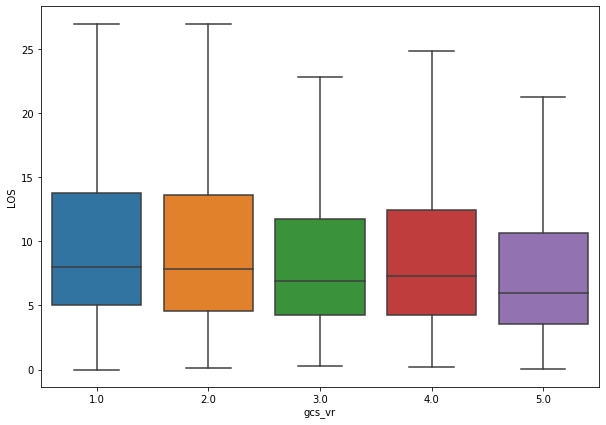

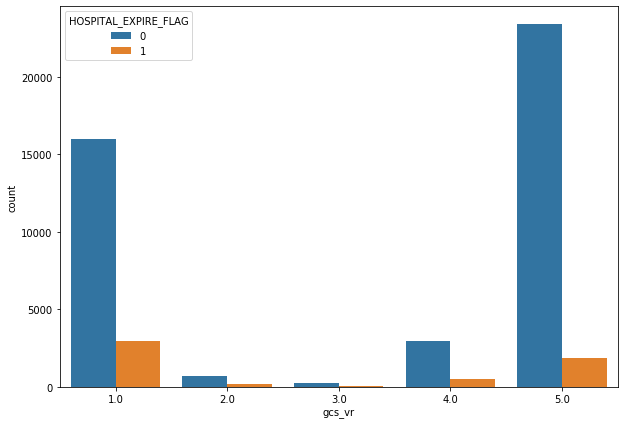

count    48904.000000
mean         4.836803
std          1.923875
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: gcs_mr, dtype: float64


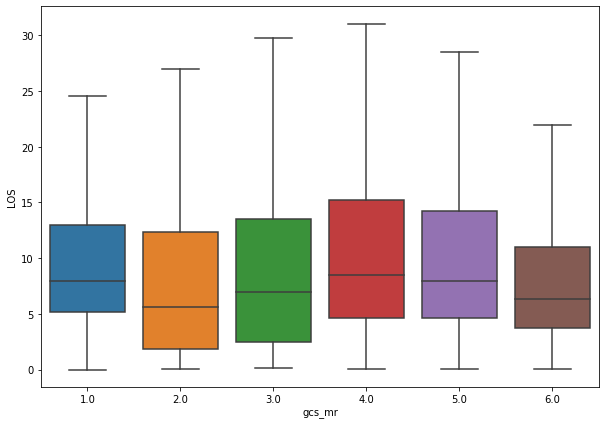

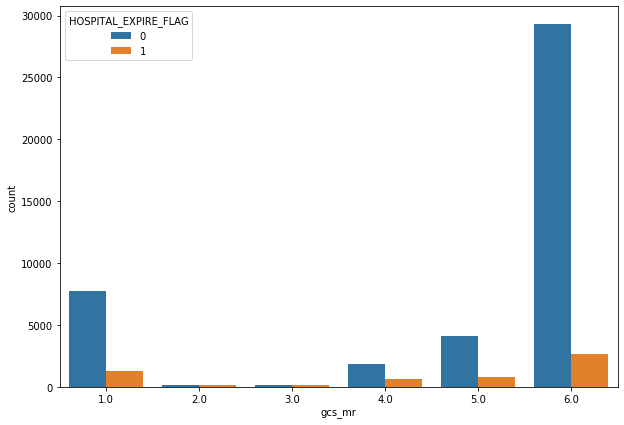

count    48916.000000
mean         3.062536
std          1.273703
min          1.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: gcs_eye, dtype: float64


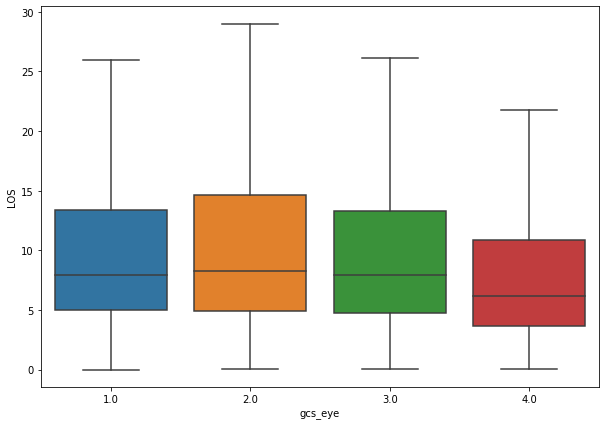

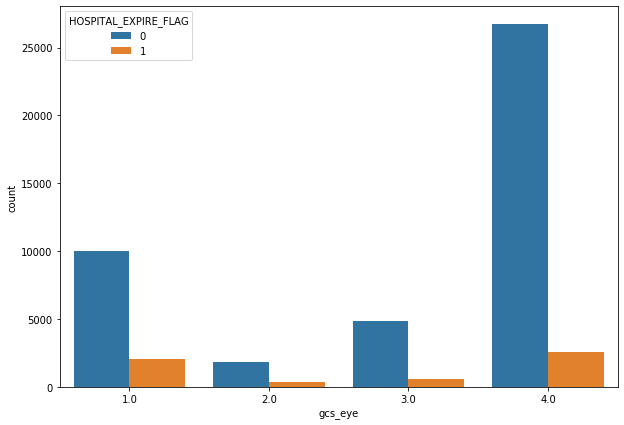

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye
0,165315,1.144444,0,1.0,6.0,3.0
1,152223,5.496528,0,1.0,1.0,1.0
2,124321,6.768056,0,5.0,6.0,4.0
3,161859,2.856944,0,5.0,6.0,4.0
4,129635,3.534028,0,5.0,6.0,4.0
...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0
50773,105447,0.662500,1,1.0,5.0,2.0
50774,191113,2.742361,0,1.0,1.0,2.0
50775,101071,0.548611,1,-1.0,-1.0,1.0


In [4]:
# gcs
name = {723: 'gcs_vr', 454:'gcs_mr', 184:'gcs_eye'}
for item in list1:
    [num1, num2] = item
    t1 = pd.read_csv('earliest_chart_items/item'+str(num1)+'.csv')
    t2 = pd.read_csv('earliest_chart_items/item'+str(num2)+'.csv')
    t1 = t1[['HADM_ID', 'VALUENUM']].rename(columns={'VALUENUM': 'v1'}).drop_duplicates('HADM_ID')
    t2 = t2[['HADM_ID', 'VALUENUM']].rename(columns={'VALUENUM': 'v2'}).drop_duplicates('HADM_ID')
    data = data.merge(t1, on='HADM_ID', how='left')
    data = data.merge(t2, on='HADM_ID', how='left')
    data = data.fillna(-1)
    data[name[num1]] = data.apply(lambda x: max(float(x.v1), float(x.v2)), axis=1)
    data = data.drop(['v1', 'v2'], axis=1)
    plot(data[[name[num1]]])
    print(data[data[name[num1]]>=0][name[num1]].describe())
    f1, a1 = plt.subplots(figsize=(10, 7))
    a1 = sns.boxplot(x=name[num1], y='LOS', data=data[data[name[num1]]>=0], showfliers=False)
    f2, a2 = plt.subplots(figsize=(10, 7))
    temp = data.groupby([name[num1], 'HOSPITAL_EXPIRE_FLAG']).size().rename('count').reset_index()
    a2 = sns.barplot(x=name[num1], y='count', data=temp[temp[name[num1]]>=0], hue='HOSPITAL_EXPIRE_FLAG')
    plt.show()
data

count    42841.000000
mean       130.530707
std         24.995213
min         13.000000
25%        113.000000
50%        128.000000
75%        146.000000
max        289.000000
Name: bp, dtype: float64


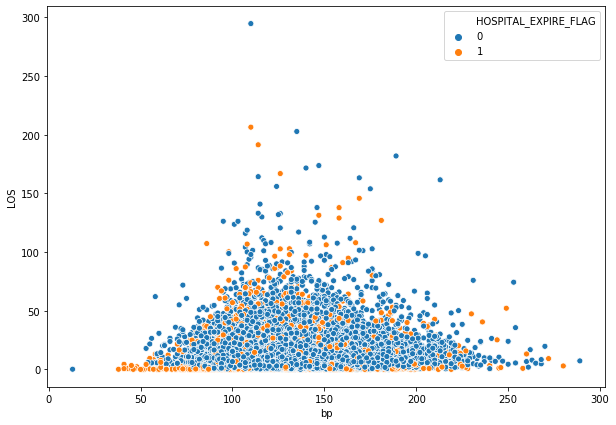

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp
0,165315,1.144444,0,1.0,6.0,3.0,130.0
1,152223,5.496528,0,1.0,1.0,1.0,106.0
2,124321,6.768056,0,5.0,6.0,4.0,-1.0
3,161859,2.856944,0,5.0,6.0,4.0,144.0
4,129635,3.534028,0,5.0,6.0,4.0,114.0
...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.0
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0


In [5]:
# bp
for item in list2:
    t = pd.read_csv('earliest_chart_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUENUM']].rename(columns={'VALUENUM': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')

data = data.fillna(-1)
data['bp'] = data.apply(lambda x: max([float(x[str(item)]) for item in list2]), axis=1)
data = data.drop([str(item) for item in list2], axis=1)
plot(data[['bp']])
print(data[data['bp']>=0]['bp'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='bp', y='LOS', data=data[data['bp']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

In [6]:
data['bp'] = data['bp'].apply(lambda x: x if (x>=14) and (x<=300) else -1)

count    42848.000000
mean        88.435512
std         19.650262
min          1.000000
25%         75.000000
50%         87.000000
75%        100.000000
max        216.000000
Name: hr, dtype: float64


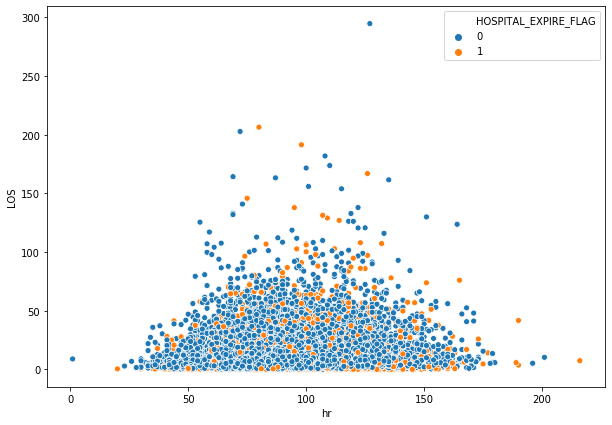

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0
2,124321,6.768056,0,5.0,6.0,4.0,-1.0,-1.0
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0
...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0,86.0


In [7]:
# hr
for item in list3:
    t = pd.read_csv('earliest_chart_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUENUM']].rename(columns={'VALUENUM': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)
data['hr'] = data.apply(lambda x: max([float(x[str(item)]) for item in list3]), axis=1)
data = data.drop([str(item) for item in list3], axis=1)
plot(data[['hr']])
print(data[data['hr']>=0]['hr'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='hr', y='LOS', data=data[data['hr']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

count    42734.000000
mean        36.703113
std          0.946531
min         26.111111
25%         36.166666
50%         36.722221
75%         37.222222
max         42.000000
Name: temp, dtype: float64


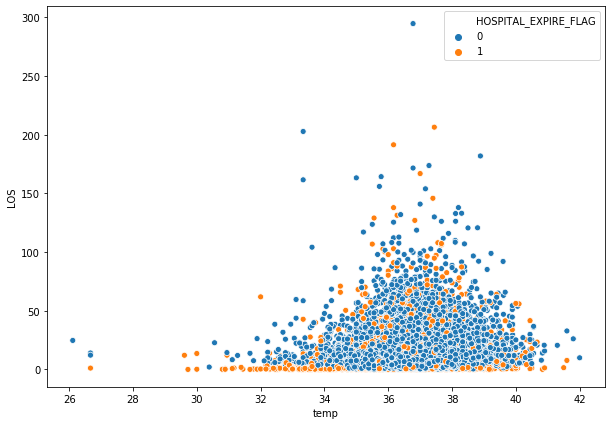

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0,36.444444
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0,36.722221
2,124321,6.768056,0,5.0,6.0,4.0,-1.0,-1.0,-1.000000
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0,36.166666
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0,36.722221
...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0,36.666667
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0,35.722222
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0,37.055556
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0,86.0,36.555556


In [8]:
# temp
for item in list4:
    t = pd.read_csv('earliest_chart_items/item'+str(item)+'.csv')
    if item in [678, 223761]:
        t['VALUE'] = 5/9 * (t['VALUE']-32)
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)

data['temp'] = data.apply(lambda x: max([float(x[str(item)]) for item in list4]), axis=1)
data = data.drop([str(item) for item in list4], axis=1)
plot(data[['temp']])
print(data[data['temp']>=0]['temp'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='temp', y='LOS', data=data[data['temp']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

count    24885.000000
mean        77.095479
std         25.852341
min         20.999999
25%         50.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: fio2, dtype: float64


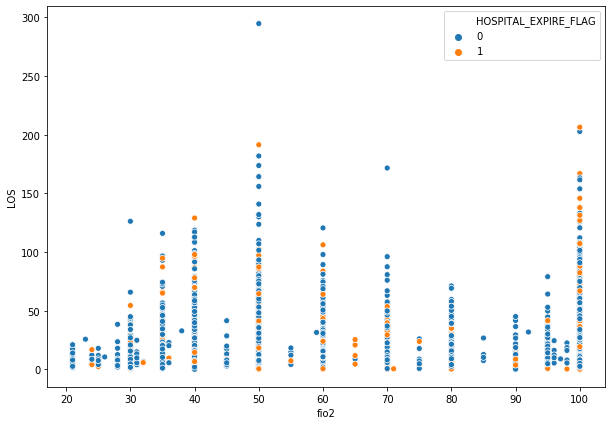

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0,36.444444,-1.0
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0,36.722221,100.0
2,124321,6.768056,0,5.0,6.0,4.0,-1.0,-1.0,-1.000000,-1.0
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0,36.166666,-1.0
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0,36.722221,-1.0
...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0,36.666667,80.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0,35.722222,60.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0,37.055556,100.0
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0,86.0,36.555556,50.0


In [9]:
# fio2 
for item in list5:
    t = pd.read_csv('earliest_chart_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)

data['fio2'] = data.apply(lambda x: max([float(x[str(item)]) for item in list5]), axis=1)
data = data.drop([str(item) for item in list5], axis=1)
plot(data[['fio2']])
print(data[data['fio2']>=0]['fio2'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='fio2', y='LOS', data=data[data['fio2']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

count    47484.000000
mean       293.182925
std        323.001992
min          0.000000
25%        100.000000
50%        200.000000
75%        400.000000
max       7300.000000
Name: urine, dtype: float64


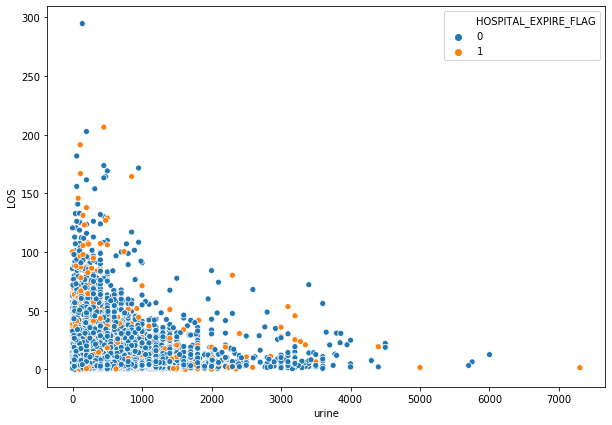

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,urine
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0,36.444444,-1.0,160.0
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0,36.722221,100.0,700.0
2,124321,6.768056,0,5.0,6.0,4.0,-1.0,-1.0,-1.000000,-1.0,400.0
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0,36.166666,-1.0,700.0
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0,36.722221,-1.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0,36.666667,80.0,140.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0,35.722222,60.0,200.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0,37.055556,100.0,25.0
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0,86.0,36.555556,50.0,625.0


In [10]:
# output
for item in list6:
    t = pd.read_csv('earliest_output_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)

data['urine'] = data.apply(lambda x: max([float(x[str(item)]) for item in list6]), axis=1)
data = data.drop([str(item) for item in list6], axis=1)
plot(data[['urine']])
print(data[data['urine']>=0]['urine'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='urine', y='LOS', data=data[data['urine']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

In [11]:
data['urine'] = data['urine'].apply(lambda x: x if (x>=0) and (x<=1200) else -1)

count    50083.000000
mean        11.739171
std         10.650872
min          0.000000
25%          7.300000
50%         10.100000
75%         14.100000
max        846.700000
Name: wbc, dtype: float64


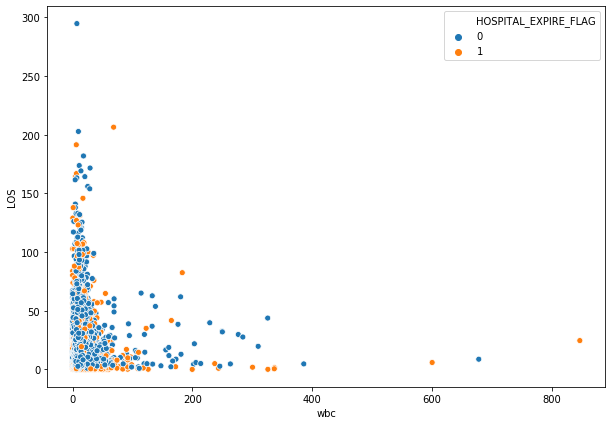

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,urine,wbc
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0,36.444444,-1.0,160.0,5.1
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0,36.722221,100.0,700.0,7.6
2,124321,6.768056,0,5.0,6.0,4.0,-1.0,-1.0,-1.000000,-1.0,400.0,10.9
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0,36.166666,-1.0,700.0,9.8
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0,36.722221,-1.0,400.0,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0,36.666667,80.0,140.0,13.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0,35.722222,60.0,200.0,6.2
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0,37.055556,100.0,25.0,8.9
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0,86.0,36.555556,50.0,625.0,30.3


In [12]:
# wbc
for item in list7:
    t = pd.read_csv('earliest_lab_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)

data['wbc'] = data.apply(lambda x: max([float(x[str(item)]) for item in list7]), axis=1)
data = data.drop([str(item) for item in list7], axis=1)
plot(data[['wbc']])
print(data[data['wbc']>=0]['wbc'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='wbc', y='LOS', data=data[data['wbc']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

count    50144.00000
mean         4.42903
std          0.89304
min          1.50000
25%          3.90000
50%          4.30000
75%          4.70000
max         18.00000
Name: potassium, dtype: float64


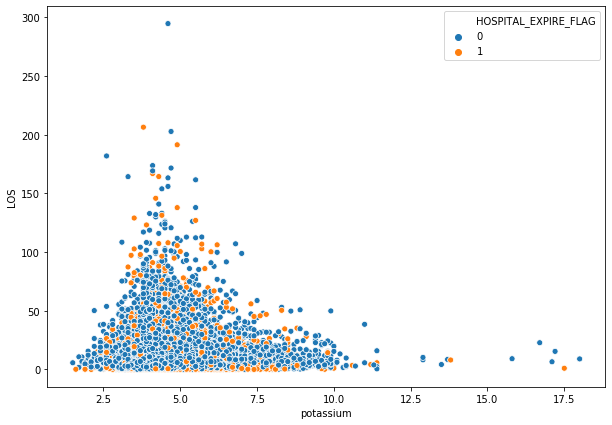

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,urine,wbc,potassium
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0,36.444444,-1.0,160.0,5.1,4.4
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0,36.722221,100.0,700.0,7.6,3.9
2,124321,6.768056,0,5.0,6.0,4.0,-1.0,-1.0,-1.000000,-1.0,400.0,10.9,4.2
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0,36.166666,-1.0,700.0,9.8,4.1
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0,36.722221,-1.0,400.0,12.2,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0,36.666667,80.0,140.0,13.0,4.2
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0,35.722222,60.0,200.0,6.2,4.6
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0,37.055556,100.0,25.0,8.9,3.3
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0,86.0,36.555556,50.0,625.0,30.3,4.2


In [13]:
# potassium
for item in list8:
    t = pd.read_csv('earliest_lab_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)

data['potassium'] = data.apply(lambda x: max([float(x[str(item)]) for item in list8]), axis=1)
data = data.drop([str(item) for item in list8], axis=1)
plot(data[['potassium']])
print(data[data['potassium']>=0]['potassium'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='potassium', y='LOS', data=data[data['potassium']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

In [14]:
data['potassium'] = data['potassium'].apply(lambda x: x if (x>=0) and (x<=12) else -1)

count    33047.000000
mean         1.280216
std          3.190808
min          0.000000
25%          0.400000
50%          0.600000
75%          1.000000
max         82.800000
Name: bilirubin, dtype: float64


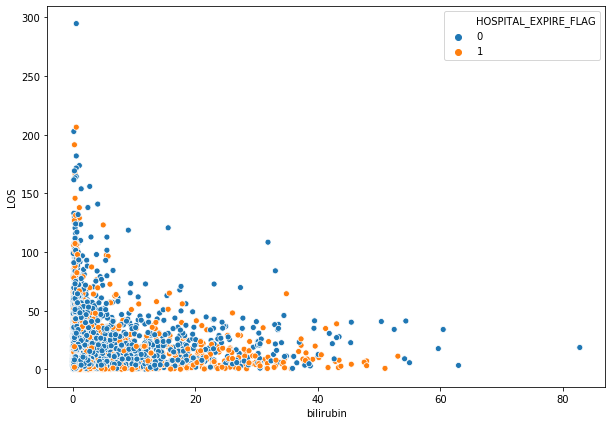

count    49962.000000
mean       138.198731
std          5.051211
min         74.000000
25%        136.000000
50%        139.000000
75%        141.000000
max        180.000000
Name: sodium, dtype: float64


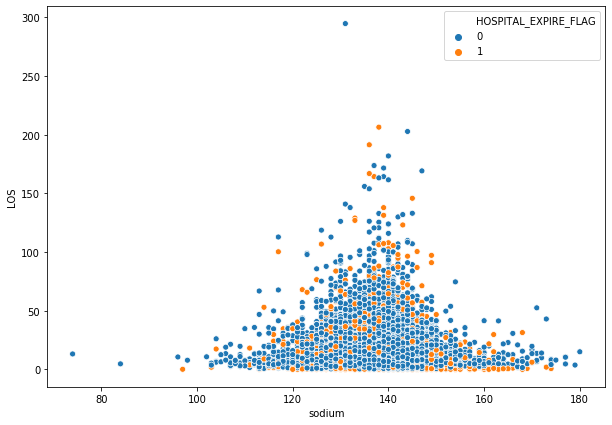

count    49954.000000
mean        24.346110
std          4.905963
min          2.000000
25%         22.000000
50%         24.000000
75%         27.000000
max         56.000000
Name: bicarb, dtype: float64


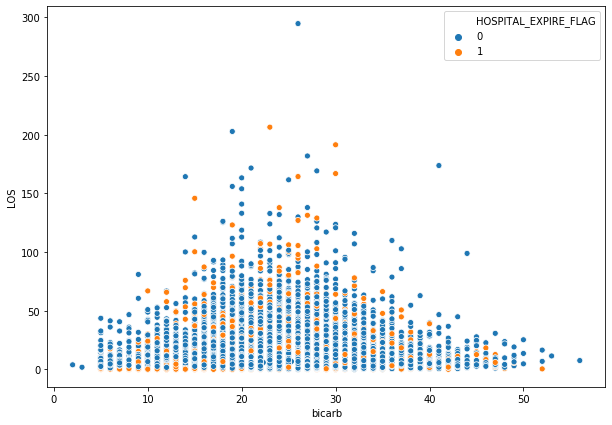

count    50104.000000
mean        27.080692
std         21.880537
min          1.000000
25%         14.000000
50%         20.000000
75%         32.000000
max        274.000000
Name: urea, dtype: float64


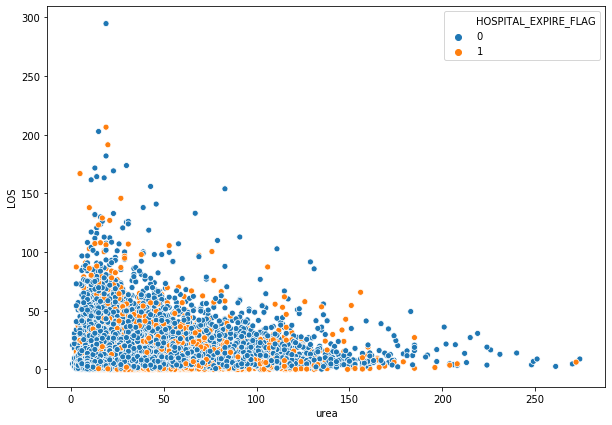

count    35258.000000
mean       198.307505
std        142.559040
min          0.000000
25%         80.000000
50%        143.000000
75%        311.000000
max        797.000000
Name: po2, dtype: float64


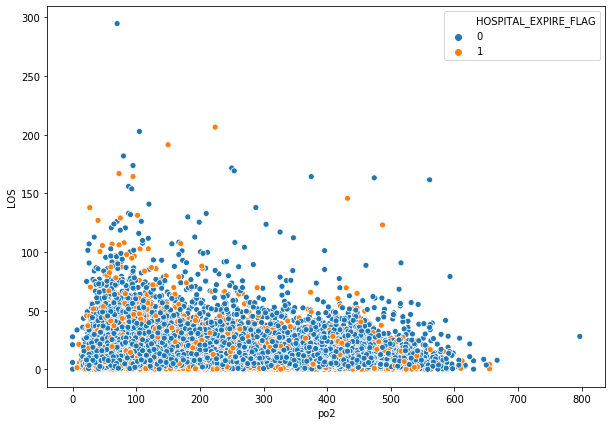

count    18264.000000
mean        68.169092
std         28.144964
min          0.000000
25%         50.000000
50%         60.000000
75%        100.000000
max        800.000000
Name: o2, dtype: float64


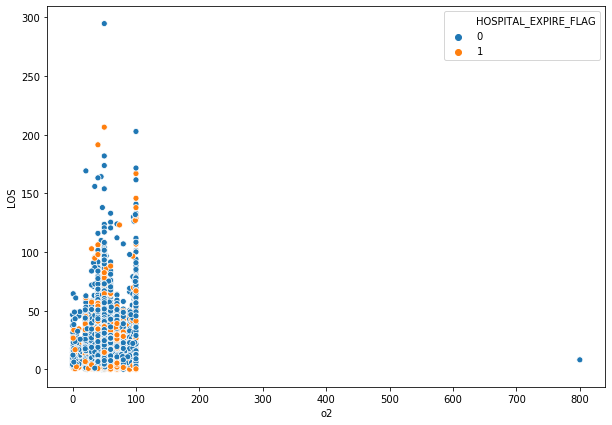

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,urine,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0,36.444444,-1.0,160.0,5.1,4.4,0.4,287.0,-1.0,17.0,28.0,140.0
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0,36.722221,100.0,700.0,7.6,3.9,-1.0,370.0,-1.0,15.0,22.0,143.0
2,124321,6.768056,0,5.0,6.0,4.0,-1.0,-1.0,-1.000000,-1.0,400.0,10.9,4.2,0.8,286.0,-1.0,16.0,27.0,140.0
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0,36.166666,-1.0,700.0,9.8,4.1,0.5,72.0,-1.0,13.0,24.0,139.0
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0,36.722221,-1.0,400.0,12.2,3.3,0.4,102.0,-1.0,50.0,23.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0,36.666667,80.0,140.0,13.0,4.2,-1.0,428.0,-1.0,27.0,21.0,141.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0,35.722222,60.0,200.0,6.2,4.6,-1.0,193.0,-1.0,15.0,29.0,149.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0,37.055556,100.0,25.0,8.9,3.3,-1.0,433.0,100.0,9.0,15.0,142.0
50775,101071,0.548611,1,-1.0,-1.0,1.0,162.0,86.0,36.555556,50.0,625.0,30.3,4.2,-1.0,227.0,100.0,20.0,-1.0,-1.0


In [15]:
names = {50885: 'bilirubin', 50983:'sodium', 50882:'bicarb', 51006:'urea', 50821:'po2', 50816:'o2'}

for item in list9:
    t = pd.read_csv('earliest_lab_items/item'+str(item)+'.csv')
    if item in [50821, 50816]:
        t['VALUE'] = clean_numeric(t['VALUE'])
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': names[item]}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
    data = data.fillna(-1)
for num in names:
    plot(data[[names[num]]])
    print(data[data[names[num]]>=0][names[num]].describe())
    f1, a1 = plt.subplots(figsize=(10, 7))
    a1 = sns.scatterplot(x=names[num], y='LOS', data=data[data[names[num]]>=0], hue='HOSPITAL_EXPIRE_FLAG')
    plt.show()
data

In [16]:
data['bilirubin'] = data['bilirubin'].apply(lambda x: x if (x>=0.1) and (x<=60) else -1)
data['urea'] = data['urea'].apply(lambda x: x if (x>=0) and (x<=250) else -1)
data['po2'] = data['po2'].apply(lambda x: x if (x>=32) and (x<=700) else -1)
data['o2'] = data['o2'].apply(lambda x: x if (x>=0) and (x<=100) else -1)

In [17]:
data = data.replace(-1, np.nan)
data

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,urine,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium
0,165315,1.144444,0,1.0,6.0,3.0,130.0,85.0,36.444444,NaN,160.0,5.1,4.4,0.4,287.0,NaN,17.0,28.0,140.0
1,152223,5.496528,0,1.0,1.0,1.0,106.0,90.0,36.722221,100.0,700.0,7.6,3.9,NaN,370.0,NaN,15.0,22.0,143.0
2,124321,6.768056,0,5.0,6.0,4.0,NaN,NaN,NaN,NaN,400.0,10.9,4.2,0.8,286.0,NaN,16.0,27.0,140.0
3,161859,2.856944,0,5.0,6.0,4.0,144.0,63.0,36.166666,NaN,700.0,9.8,4.1,0.5,72.0,NaN,13.0,24.0,139.0
4,129635,3.534028,0,5.0,6.0,4.0,114.0,72.0,36.722221,NaN,400.0,12.2,3.3,0.4,102.0,NaN,50.0,23.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.0,80.0,36.666667,80.0,140.0,13.0,4.2,NaN,428.0,NaN,27.0,21.0,141.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.0,81.0,35.722222,60.0,200.0,6.2,4.6,NaN,193.0,NaN,15.0,29.0,149.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.0,122.0,37.055556,100.0,25.0,8.9,3.3,NaN,433.0,100.0,9.0,15.0,142.0
50775,101071,0.548611,1,NaN,NaN,1.0,162.0,86.0,36.555556,50.0,625.0,30.3,4.2,NaN,227.0,100.0,20.0,NaN,NaN


In [18]:
for col_name in data.columns.tolist():
    print(col_name)

HADM_ID
LOS
HOSPITAL_EXPIRE_FLAG
gcs_vr
gcs_mr
gcs_eye
bp
hr
temp
fio2
urine
wbc
potassium
bilirubin
po2
o2
urea
bicarb
sodium


In [19]:
cols = data.columns.tolist()[3:]

for col_name in cols:
    num_values = len(data[col_name].unique())
    if num_values > 10:
        is_continuous = 1
    else:
        is_continuous = 0

    data = fill_missing_mean(data, col_name, is_continuous)
data

gcs_vr
gcs_mr
gcs_eye
130.53345004668535
88.435511575696
36.703112693173026
77.09547931132174
267.2394957083842
11.739170976179562
4.426628767478477
1.2748607073643612
200.63176656604858
68.1290204238077
27.056887363021218
24.346110421587863
138.19873103558706


,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,urine,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium
0,165315,1.144444,0,1.0,6.0,3.0,130.00000,85.000000,36.444444,77.095479,160.0,5.1,4.4,0.400000,287.0,68.12902,17.0,28.00000,140.000000
1,152223,5.496528,0,1.0,1.0,1.0,106.00000,90.000000,36.722221,100.000000,700.0,7.6,3.9,1.274861,370.0,68.12902,15.0,22.00000,143.000000
2,124321,6.768056,0,5.0,6.0,4.0,130.53345,88.435512,36.703113,77.095479,400.0,10.9,4.2,0.800000,286.0,68.12902,16.0,27.00000,140.000000
3,161859,2.856944,0,5.0,6.0,4.0,144.00000,63.000000,36.166666,77.095479,700.0,9.8,4.1,0.500000,72.0,68.12902,13.0,24.00000,139.000000
4,129635,3.534028,0,5.0,6.0,4.0,114.00000,72.000000,36.722221,77.095479,400.0,12.2,3.3,0.400000,102.0,68.12902,50.0,23.00000,134.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.00000,80.000000,36.666667,80.000000,140.0,13.0,4.2,1.274861,428.0,68.12902,27.0,21.00000,141.000000
50773,105447,0.662500,1,1.0,5.0,2.0,153.00000,81.000000,35.722222,60.000000,200.0,6.2,4.6,1.274861,193.0,68.12902,15.0,29.00000,149.000000
50774,191113,2.742361,0,1.0,1.0,2.0,120.00000,122.000000,37.055556,100.000000,25.0,8.9,3.3,1.274861,433.0,100.00000,9.0,15.00000,142.000000
50775,101071,0.548611,1,3.0,3.0,1.0,162.00000,86.000000,36.555556,50.000000,625.0,30.3,4.2,1.274861,227.0,100.00000,20.0,24.34611,138.198731


In [20]:
data.to_csv('16features.csv')

# Additional Features

In [21]:
data = pd.read_csv('16features.csv').drop('Unnamed: 0', axis=1)

In [22]:
# Add these 2 values because these 2 
# rr
list10 = [615, 618, 220210, 224690]
# spo2
list11 = [220277, 646]

count    42830.000000
mean        19.165328
std          6.401172
min          0.000000
25%         15.000000
50%         18.000000
75%         22.000000
max        211.000000
Name: rr, dtype: float64


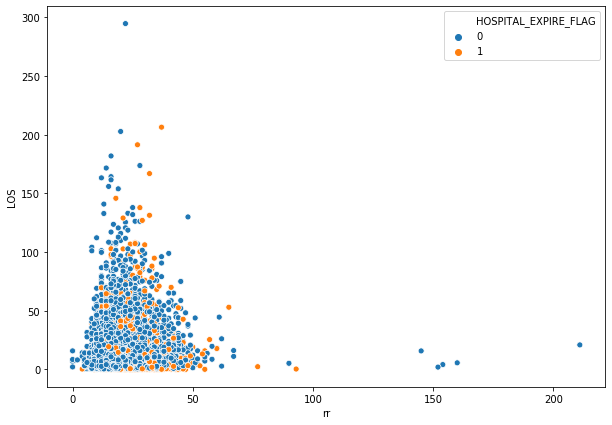

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,urine,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium,rr
0,165315,1.144444,0,1.0,6.0,3.0,130.00000,85.000000,36.444444,77.095479,160.0,5.1,4.4,0.400000,287.0,68.12902,17.0,28.00000,140.000000,18.0
1,152223,5.496528,0,1.0,1.0,1.0,106.00000,90.000000,36.722221,100.000000,700.0,7.6,3.9,1.274861,370.0,68.12902,15.0,22.00000,143.000000,12.0
2,124321,6.768056,0,5.0,6.0,4.0,130.53345,88.435512,36.703113,77.095479,400.0,10.9,4.2,0.800000,286.0,68.12902,16.0,27.00000,140.000000,-1.0
3,161859,2.856944,0,5.0,6.0,4.0,144.00000,63.000000,36.166666,77.095479,700.0,9.8,4.1,0.500000,72.0,68.12902,13.0,24.00000,139.000000,18.0
4,129635,3.534028,0,5.0,6.0,4.0,114.00000,72.000000,36.722221,77.095479,400.0,12.2,3.3,0.400000,102.0,68.12902,50.0,23.00000,134.000000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.00000,80.000000,36.666667,80.000000,140.0,13.0,4.2,1.274861,428.0,68.12902,27.0,21.00000,141.000000,14.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.00000,81.000000,35.722222,60.000000,200.0,6.2,4.6,1.274861,193.0,68.12902,15.0,29.00000,149.000000,24.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.00000,122.000000,37.055556,100.000000,25.0,8.9,3.3,1.274861,433.0,100.00000,9.0,15.00000,142.000000,28.0
50775,101071,0.548611,1,3.0,3.0,1.0,162.00000,86.000000,36.555556,50.000000,625.0,30.3,4.2,1.274861,227.0,100.00000,20.0,24.34611,138.198731,29.0


In [23]:
# rr
for item in list10:
    t = pd.read_csv('earliest_chart_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)

data['rr'] = data.apply(lambda x: max([float(x[str(item)]) for item in list10]), axis=1)
data = data.drop([str(item) for item in list10], axis=1)
plot(data[['rr']])
print(data[data['rr']>=0]['rr'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='rr', y='LOS', data=data[data['rr']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

count    48718.000000
mean        96.691651
std          5.064348
min          0.000000
25%         96.000000
50%         98.000000
75%         99.000000
max        100.000000
Name: spo2, dtype: float64


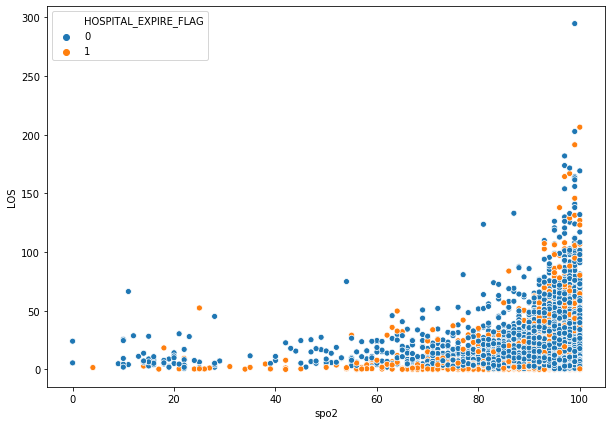

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,...,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium,rr,spo2
0,165315,1.144444,0,1.0,6.0,3.0,130.00000,85.000000,36.444444,77.095479,...,5.1,4.4,0.400000,287.0,68.12902,17.0,28.00000,140.000000,18.0,99.0
1,152223,5.496528,0,1.0,1.0,1.0,106.00000,90.000000,36.722221,100.000000,...,7.6,3.9,1.274861,370.0,68.12902,15.0,22.00000,143.000000,12.0,93.0
2,124321,6.768056,0,5.0,6.0,4.0,130.53345,88.435512,36.703113,77.095479,...,10.9,4.2,0.800000,286.0,68.12902,16.0,27.00000,140.000000,-1.0,100.0
3,161859,2.856944,0,5.0,6.0,4.0,144.00000,63.000000,36.166666,77.095479,...,9.8,4.1,0.500000,72.0,68.12902,13.0,24.00000,139.000000,18.0,97.0
4,129635,3.534028,0,5.0,6.0,4.0,114.00000,72.000000,36.722221,77.095479,...,12.2,3.3,0.400000,102.0,68.12902,50.0,23.00000,134.000000,21.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.00000,80.000000,36.666667,80.000000,...,13.0,4.2,1.274861,428.0,68.12902,27.0,21.00000,141.000000,14.0,100.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.00000,81.000000,35.722222,60.000000,...,6.2,4.6,1.274861,193.0,68.12902,15.0,29.00000,149.000000,24.0,100.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.00000,122.000000,37.055556,100.000000,...,8.9,3.3,1.274861,433.0,100.00000,9.0,15.00000,142.000000,28.0,100.0
50775,101071,0.548611,1,3.0,3.0,1.0,162.00000,86.000000,36.555556,50.000000,...,30.3,4.2,1.274861,227.0,100.00000,20.0,24.34611,138.198731,29.0,100.0


In [24]:
for item in list11:
    t = pd.read_csv('earliest_chart_items/item'+str(item)+'.csv')
    t = t[['HADM_ID', 'VALUE']].rename(columns={'VALUE': str(item)}).drop_duplicates('HADM_ID')
    data = data.merge(t, on='HADM_ID', how='left')
data = data.fillna(-1)

data['spo2'] = data.apply(lambda x: max([float(x[str(item)]) for item in list11]), axis=1)
data = data.drop([str(item) for item in list11], axis=1)
plot(data[['spo2']])
print(data[data['spo2']>=0]['spo2'].describe())
f1, a1 = plt.subplots(figsize=(10, 7))
a1 = sns.scatterplot(x='spo2', y='LOS', data=data[data['spo2']>=0], hue='HOSPITAL_EXPIRE_FLAG')
plt.show()
data

In [25]:
data = data.replace(-1, np.nan)
cols = ['rr', 'spo2']
for col_name in cols:
    num_values = len(data[col_name].unique())
    if num_values > 10:
        is_continuous = 1
    else:
        is_continuous = 0

    data = fill_missing_mean(data, col_name, is_continuous)
data

19.165328041092693
96.69165092980981


,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,...,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium,rr,spo2
0,165315,1.144444,0,1.0,6.0,3.0,130.00000,85.000000,36.444444,77.095479,...,5.1,4.4,0.400000,287.0,68.12902,17.0,28.00000,140.000000,18.000000,99.0
1,152223,5.496528,0,1.0,1.0,1.0,106.00000,90.000000,36.722221,100.000000,...,7.6,3.9,1.274861,370.0,68.12902,15.0,22.00000,143.000000,12.000000,93.0
2,124321,6.768056,0,5.0,6.0,4.0,130.53345,88.435512,36.703113,77.095479,...,10.9,4.2,0.800000,286.0,68.12902,16.0,27.00000,140.000000,19.165328,100.0
3,161859,2.856944,0,5.0,6.0,4.0,144.00000,63.000000,36.166666,77.095479,...,9.8,4.1,0.500000,72.0,68.12902,13.0,24.00000,139.000000,18.000000,97.0
4,129635,3.534028,0,5.0,6.0,4.0,114.00000,72.000000,36.722221,77.095479,...,12.2,3.3,0.400000,102.0,68.12902,50.0,23.00000,134.000000,21.000000,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.00000,80.000000,36.666667,80.000000,...,13.0,4.2,1.274861,428.0,68.12902,27.0,21.00000,141.000000,14.000000,100.0
50773,105447,0.662500,1,1.0,5.0,2.0,153.00000,81.000000,35.722222,60.000000,...,6.2,4.6,1.274861,193.0,68.12902,15.0,29.00000,149.000000,24.000000,100.0
50774,191113,2.742361,0,1.0,1.0,2.0,120.00000,122.000000,37.055556,100.000000,...,8.9,3.3,1.274861,433.0,100.00000,9.0,15.00000,142.000000,28.000000,100.0
50775,101071,0.548611,1,3.0,3.0,1.0,162.00000,86.000000,36.555556,50.000000,...,30.3,4.2,1.274861,227.0,100.00000,20.0,24.34611,138.198731,29.000000,100.0


In [26]:
data.to_csv('18features.csv')